심층 신경망

In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# 데이터 표준화
x_train_scaled = x_train / 255.0
x_train_scaled = x_train_scaled.reshape(-1,28*28)
# 데이터 분할
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x_train_scaled, y_train,test_size=0.2, random_state=0)

dense1 = tf.keras.layers.Dense(100,activation='sigmoid', input_shape = (x_tr.shape[1],) )
dense2 = tf.keras.layers.Dense(10,activation='softmax' )
model = tf.keras.Sequential([dense1,dense2])

In [5]:
x_tr.shape

(48000, 784)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')
model.fit(x_tr,y_tr,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.5724 - acc: 0.8069
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4127 - acc: 0.8501
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3763 - acc: 0.8631
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3528 - acc: 0.8730
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3357 - acc: 0.8786


Flatten 층

In [8]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Flatten(input_shape = (28,28))  )
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')
model.fit(x_train / 255.0,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5411 - acc: 0.8145
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3995 - acc: 0.8558
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3652 - acc: 0.8678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3431 - acc: 0.8757
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3260 - acc: 0.8822


In [10]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Flatten(input_shape = (28,28))  )
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='acc')
model.fit(x_train / 255.0,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5130 - acc: 0.8187
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3823 - acc: 0.8616
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3468 - acc: 0.8748
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3293 - acc: 0.8824
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3177 - acc: 0.8880


In [12]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Flatten(input_shape = (28,28))  )
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='acc' )
model.fit(x_train / 255.0,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5028 - acc: 0.8239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3794 - acc: 0.8634
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - acc: 0.8762
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3166 - acc: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2974 - acc: 0.8920


In [13]:
def model_fn(a_layer = None):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
  model.add(tf.keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(tf.keras.layers.Dense(10,activation='softmax'))
  return model

In [14]:
(train_input,train_target),(test_input,test_target) = tf.keras.datasets.fashion_mnist.load_data()
train_scaled =  train_input / 255.0
x_train,x_test,y_train,y_test =  train_test_split(train_scaled,train_target,test_size=0.2,random_state=0)

In [15]:
model = model_fn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='acc')
history = model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5371 - acc: 0.8117
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3916 - acc: 0.8608
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3528 - acc: 0.8737
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3316 - acc: 0.8813
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3157 - acc: 0.8865


In [17]:
history.history.keys()

dict_keys(['loss', 'acc'])

In [18]:
import matplotlib.pyplot as plt

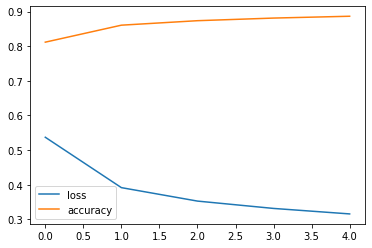

In [19]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='accuracy')
plt.legend()
plt.show()

In [22]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='acc')
history = model.fit(x_train,y_train,epochs=20,batch_size=50)

Epoch 1/20
960/960 [==============================] - 4s 3ms/step - loss: 0.5626 - acc: 0.8037
Epoch 2/20
960/960 [==============================] - 2s 2ms/step - loss: 0.4061 - acc: 0.8543
Epoch 3/20
960/960 [==============================] - 2s 2ms/step - loss: 0.3629 - acc: 0.8685
Epoch 4/20
960/960 [==============================] - 2s 2ms/step - loss: 0.3359 - acc: 0.8780
Epoch 5/20
960/960 [==============================] - 2s 2ms/step - loss: 0.3181 - acc: 0.8856
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3047 - acc: 0.8905
Epoch 7/20
960/960 [==============================] - 2s 2ms/step - loss: 0.2927 - acc: 0.8927
Epoch 8/20
960/960 [==============================] - 2s 2ms/step - loss: 0.2835 - acc: 0.8969
Epoch 9/20
960/960 [==============================] - 2s 2ms/step - loss: 0.2722 - acc: 0.9006
Epoch 10/20
960/960 [==============================] - 2s 2ms/step - loss: 0.2664 - acc: 0.9025
Epoch 11/20
960/960 [============================

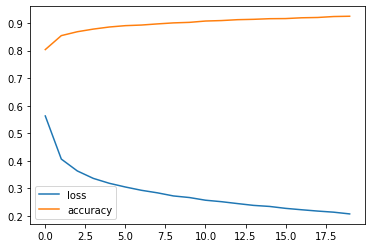

In [23]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='accuracy')
plt.legend()
plt.show()

검증

In [24]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='acc')
history = model.fit(x_train,y_train,epochs=20,batch_size=50, validation_data=(x_test,y_test) )

Epoch 1/20
960/960 [==============================] - 4s 3ms/step - loss: 0.5593 - acc: 0.8042 - val_loss: 0.4709 - val_acc: 0.8286
Epoch 2/20
960/960 [==============================] - 3s 4ms/step - loss: 0.4030 - acc: 0.8533 - val_loss: 0.4014 - val_acc: 0.8533
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3587 - acc: 0.8704 - val_loss: 0.3713 - val_acc: 0.8673
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3342 - acc: 0.8788 - val_loss: 0.3509 - val_acc: 0.8733
Epoch 5/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3168 - acc: 0.8840 - val_loss: 0.3467 - val_acc: 0.8796
Epoch 6/20
960/960 [==============================] - 4s 4ms/step - loss: 0.3039 - acc: 0.8902 - val_loss: 0.3428 - val_acc: 0.8797
Epoch 7/20
960/960 [==============================] - 3s 3ms/step - loss: 0.2891 - acc: 0.8947 - val_loss: 0.3606 - val_acc: 0.8742
Epoch 8/20
960/960 [==============================] - 3s 3ms/step - loss: 0.

In [25]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

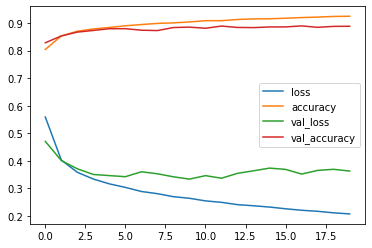

In [26]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

In [27]:
dropout = tf.keras.layers.Dropout(0.3)
model = model_fn(dropout)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
960/960 [==============================] - 5s 4ms/step - loss: 0.6069 - acc: 0.7871 - val_loss: 0.4173 - val_acc: 0.8508
Epoch 2/20
960/960 [==============================] - 3s 3ms/step - loss: 0.4438 - acc: 0.8415 - val_loss: 0.3806 - val_acc: 0.8617
Epoch 3/20
960/960 [==============================] - 3s 3ms/step - loss: 0.4077 - acc: 0.8547 - val_loss: 0.3634 - val_acc: 0.8703
Epoch 4/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3907 - acc: 0.8607 - val_loss: 0.3649 - val_acc: 0.8723
Epoch 5/20
960/960 [==============================] - 4s 4ms/step - loss: 0.3755 - acc: 0.8658 - val_loss: 0.3514 - val_acc: 0.8755
Epoch 6/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3659 - acc: 0.8697 - val_loss: 0.3787 - val_acc: 0.8702
Epoch 7/20
960/960 [==============================] - 3s 3ms/step - loss: 0.3608 - acc: 0.8719 - val_loss: 0.3471 - val_acc: 0.8806
Epoch 8/20
960/960 [==============================] - 3s 3ms/step - loss: 0.

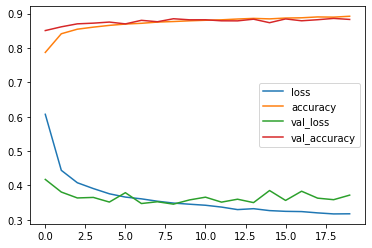

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='acc')
history = model.fit(x_train,y_train,epochs=20,batch_size=50, validation_data=(x_test,y_test) )
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_acc'],label='val_accuracy')
plt.legend()
plt.show()

심층신경망
  - Dense가 여러개
  - 데이터를 reshape안하고 Flatten 레이어를 이용해서 모델 안에서 차수를 변경
  - 데이터의 층이 여러개일수록 과적합 가능성이 높아지므로
  - DropOut층을 적용해서 일정비율로 가중치를 무효화한다.(모델단순화)
  - 활성화 함수는 relu
  - 옵티마이져 : adam
  - 학습할때 배치사이즈를 조정해서 학습속도를 증가

In [29]:
model.save('model-whole.h5')

In [30]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model-whole.h5')
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.fashion_mnist.load_data()
x_train_scaled = x_train / 255.0
model.evaluate(x_train_scaled,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2748 - acc: 0.9048


[0.27484777569770813, 0.904783308506012]

In [31]:
x_test_scaled = x_test / 255.0
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.4030 - acc: 0.8741


[0.4029942750930786, 0.8741000294685364]

In [43]:
from keras.layers.attention.multi_head_attention import activation
# 층을 여러개 ..... 원하는 만큼 5개 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)) )
model.add(tf.keras.layers.Dense(500,activation='relu')   )  # Dense
model.add(tf.keras.layers.Dense(250,activation='relu')    )  # Dense
model.add(tf.keras.layers.Dense(145,activation='relu')    )  # Dense
model.add(tf.keras.layers.Dense(72,activation='relu')    )  # Dense
model.add(tf.keras.layers.Dense(10,activation='softmax') )  # Dense
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 500)               392500    
                                                                 
 dense_41 (Dense)            (None, 250)               125250    
                                                                 
 dense_42 (Dense)            (None, 145)               36395     
                                                                 
 dense_43 (Dense)            (None, 72)                10512     
                                                                 
 dense_44 (Dense)            (None, 10)                730       
                                                                 
Total params: 565,387
Trainable params: 565,387
Non-t

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# 옵티마이져 adam, loss = 'sparse.    , metrics = 'acc'
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=adam, loss = tf.keras.losses.sparse_categorical_crossentropy,metrics='acc')
# epoch = 20 batchsize = 50
hist =  model.fit(x_train_scaled,y_train,epochs=20, batch_size=50,validation_data=(x_test_scaled,y_test),
                  callbacks = [checkpoint_cb,early_stopping_cb])

Epoch 1/20
1200/1200 [==============================] - 6s 4ms/step - loss: 0.5865 - acc: 0.8022 - val_loss: 0.4712 - val_acc: 0.8301
Epoch 2/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.3958 - acc: 0.8619 - val_loss: 0.4132 - val_acc: 0.8558
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3536 - acc: 0.8748 - val_loss: 0.3818 - val_acc: 0.8639
Epoch 4/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3255 - acc: 0.8835 - val_loss: 0.3608 - val_acc: 0.8734
Epoch 5/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3051 - acc: 0.8896 - val_loss: 0.3524 - val_acc: 0.8732
Epoch 6/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.2895 - acc: 0.8947 - val_loss: 0.3422 - val_acc: 0.8766
Epoch 7/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.2747 - acc: 0.9004 - val_loss: 0.3502 - val_acc: 0.8727
Epoch 8/20
1200/1200 [==============================] - 5s 4ms